## Introductory Machine Learning: Assignment 1

## Problem 1: Linear Regression with Covid Data

The New York Times Covid-19 Database is 
a county-level database of confirmed cases and deaths, 
compiled from state and local governments and health departments across the United States.
The initial release of the database was on Thursday, March 26, 2020, and it is updated daily. 

The data are publically available via GitHub: [https://github.com/nytimes/covid-19-data](https://www.nytimes.com/interactive/2020/us/coronavirus-us-cases.html).  In this problem we will only use the data aggregated across states.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from numpy.linalg import inv

### Load the data

First, read the whole dataset including the accumulated cases and deaths for each state for each day.

In [2]:
covid_table = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
covid_table = covid_table.drop('fips', axis=1) # Drop the fips column, as we don't need it
covid_table.tail(10) # Show the last 10 rows of the dataframe

,date,state,cases,deaths
31189,2021-09-20,Tennessee,1163270,14334
31190,2021-09-20,Texas,3938756,62432
31191,2021-09-20,Utah,494466,2804
31192,2021-09-20,Vermont,31764,298
31193,2021-09-20,Virgin Islands,6458,67
31194,2021-09-20,Virginia,836140,12312
31195,2021-09-20,Washington,630495,7319
31196,2021-09-20,West Virginia,224435,3424
31197,2021-09-20,Wisconsin,779921,8713
31198,2021-09-20,Wyoming,85499,918


### Aggregate data across states

We can merge data from different states to get the total number of cases and deaths for the country. Here we also show an example of visualizing the data.

In [3]:
merged_data = covid_table.drop('state', axis=1)
merged_data = merged_data.groupby('date').sum() # We first group the data according to date and then sum the values
merged_data.tail(10)

,cases,deaths
date,,
2021-09-11,40988382,659556
2021-09-12,41027940,659854
2021-09-13,41312998,661579
2021-09-14,41465694,664235
2021-09-15,41635889,666816
2021-09-16,41790772,670234
2021-09-17,41957981,672813
2021-09-18,42026148,673637
2021-09-19,42066090,673939


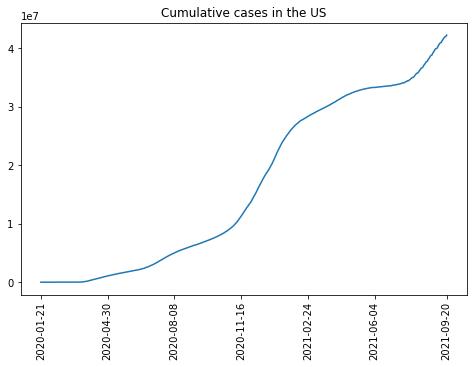

In [4]:
new_cases = np.diff(merged_data['cases']) # Calculates the difference between the successive days to get new cases
dates = np.array(merged_data['cases'].index)
plt.figure(figsize=(8,5))
plt.plot(dates, merged_data['cases'])
plt.xticks(dates[[0, 100, 200, 300, 400, 500, len(dates)-1]], rotation=90)
_ = plt.title('Cumulative cases in the US')

### Problem 1.1

Let's call April 1, 2021 to May 1, 2021 Period 1. The following code extracts the cumulative cases, deaths, and days during this period



In [5]:
first_date1 = '2021-04-01'
last_date1 = '2021-05-01'
merged_data_period1 = merged_data[(merged_data['cases'].index >= first_date1) & \
                                  (merged_data['cases'].index  <= last_date1)]
merged_data_period1.insert(2,"days",np.arange(len(merged_data_period1))+1)
# Insert a new column with DataFrame.insert(loc, column, value)
merged_data_period1.head(10)


,cases,deaths,days
date,,,
2021-04-01,30556079,552615,1
2021-04-02,30624668,553571,2
2021-04-03,30688804,554324,3
2021-04-04,30725627,554596,4
2021-04-05,30802221,555126,5
2021-04-06,30864193,556035,6
2021-04-07,30937283,558606,7
2021-04-08,31017741,559608,8
2021-04-09,31099323,560554,9


#### Problem 1.1.a

Visualize the accumulated cases in period 1. You can use any graph you like, such as line plot, scatter plot, and bar plot. The x-axis should be `days`.



In [6]:
dates_period1 = np.array(merged_data_period1['cases'].index)
len(dates_period1)

31

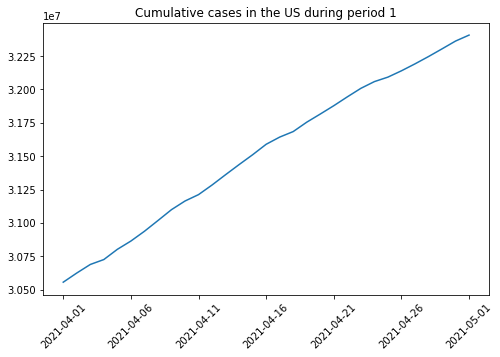

In [7]:
plt.figure(figsize=(8,5))

plt.plot(dates_period1, merged_data_period1['cases'])
plt.xticks(dates_period1[[0, 5, 10, 15, 20, 25, len(dates_period1)-1]], rotation=45)
_ = plt.title('Cumulative cases in the US during period 1')

#### Problem 1.1.b

Now, calculate the least-squares estimates of the coefficients for the linear model that includes a slope and an intercept: 

$$\text{cases}_i = \beta_0 + \beta_1 \text{days}_i + \epsilon_i$$



In [8]:
cases_yvector1 = merged_data_period1['cases']
days_xvector1 = merged_data_period1['days']

X = sm.add_constant(data = days_xvector1)

beta_vector1 = inv(X.T @ X) @ X.T @ cases_yvector1
beta_vector1


/Users/louisdeschuttere/opt/anaconda3/envs/iML/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


0    3.052012e+07
1    6.306558e+04
dtype: float64

In [9]:
yhat1 = beta_vector1[0] + beta_vector1[1] * days_xvector1
yhat1

date
2021-04-01    3.058319e+07
2021-04-02    3.064625e+07
2021-04-03    3.070932e+07
2021-04-04    3.077238e+07
2021-04-05    3.083545e+07
2021-04-06    3.089852e+07
2021-04-07    3.096158e+07
2021-04-08    3.102465e+07
2021-04-09    3.108771e+07
2021-04-10    3.115078e+07
2021-04-11    3.121384e+07
2021-04-12    3.127691e+07
2021-04-13    3.133997e+07
2021-04-14    3.140304e+07
2021-04-15    3.146611e+07
2021-04-16    3.152917e+07
2021-04-17    3.159224e+07
2021-04-18    3.165530e+07
2021-04-19    3.171837e+07
2021-04-20    3.178143e+07
2021-04-21    3.184450e+07
2021-04-22    3.190756e+07
2021-04-23    3.197063e+07
2021-04-24    3.203370e+07
2021-04-25    3.209676e+07
2021-04-26    3.215983e+07
2021-04-27    3.222289e+07
2021-04-28    3.228596e+07
2021-04-29    3.234902e+07
2021-04-30    3.241209e+07
2021-05-01    3.247515e+07
Name: days, dtype: float64

#### Problem 1.1.c 

Now, plot the data together with the linear fit, shown as a straight line.

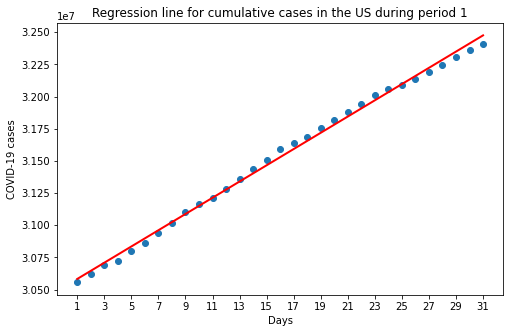

In [10]:
plt.figure(figsize=(8,5))

plt.scatter(days_xvector1, cases_yvector1)
plt.plot(days_xvector1, yhat1, color='red', linewidth=2)
plt.xticks(days_xvector1[::2])
plt.xlabel('Days')
plt.ylabel('COVID-19 cases')
_ = plt.title('Regression line for cumulative cases in the US during period 1')

### Problem 1.2

Modify the code in 1.1 to fit and visualize a linear regression model for Period 2, July 1, 2021 to August 1, 2021.

In [11]:
first_date2 = '2021-07-01'
last_date2 = '2021-08-01'
merged_data_period2 = merged_data[(merged_data['cases'].index >= first_date2) & \
                                  (merged_data['cases'].index  <= last_date2)]
merged_data_period2.insert(2,"days",np.arange(len(merged_data_period2))+1)
merged_data_period2.head(10)

,cases,deaths,days
date,,,
2021-07-01,33704723,604693,1
2021-07-02,33725159,604959,2
2021-07-03,33729152,605045,3
2021-07-04,33732074,605082,4
2021-07-05,33736665,605123,5
2021-07-06,33763742,605440,6
2021-07-07,33793961,605762,7
2021-07-08,33843194,606128,8
2021-07-09,33878529,606535,9


#### Problem 1.2.a

Visualize the data


In [12]:
dates_period2 = np.array(merged_data_period2['cases'].index)
len(dates_period2)

32

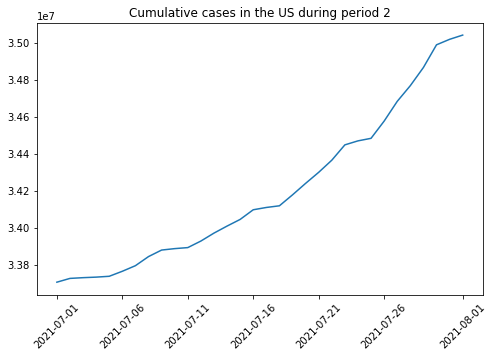

In [13]:
plt.figure(figsize=(8,5))

plt.plot(dates_period2, merged_data_period2['cases'])
plt.xticks(dates_period2[[0, 5, 10, 15, 20, 25, len(dates_period2)-1]], rotation=45)
_ = plt.title('Cumulative cases in the US during period 2')

#### Problem 1.2.b

Compute a linear regression

In [14]:
cases_yvector2 = merged_data_period2['cases']
days_xvector2 = merged_data_period2['days']

X = sm.add_constant(data = days_xvector2)

beta_vector2 = inv(X.T @ X) @ X.T @ cases_yvector2
beta_vector2

/Users/louisdeschuttere/opt/anaconda3/envs/iML/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


0    3.348043e+07
1    4.357361e+04
dtype: float64

In [15]:
yhat2 = beta_vector2[0] + beta_vector2[1] * days_xvector2
yhat2

date
2021-07-01    3.352400e+07
2021-07-02    3.356757e+07
2021-07-03    3.361115e+07
2021-07-04    3.365472e+07
2021-07-05    3.369829e+07
2021-07-06    3.374187e+07
2021-07-07    3.378544e+07
2021-07-08    3.382902e+07
2021-07-09    3.387259e+07
2021-07-10    3.391616e+07
2021-07-11    3.395974e+07
2021-07-12    3.400331e+07
2021-07-13    3.404688e+07
2021-07-14    3.409046e+07
2021-07-15    3.413403e+07
2021-07-16    3.417760e+07
2021-07-17    3.422118e+07
2021-07-18    3.426475e+07
2021-07-19    3.430832e+07
2021-07-20    3.435190e+07
2021-07-21    3.439547e+07
2021-07-22    3.443905e+07
2021-07-23    3.448262e+07
2021-07-24    3.452619e+07
2021-07-25    3.456977e+07
2021-07-26    3.461334e+07
2021-07-27    3.465691e+07
2021-07-28    3.470049e+07
2021-07-29    3.474406e+07
2021-07-30    3.478763e+07
2021-07-31    3.483121e+07
2021-08-01    3.487478e+07
Name: days, dtype: float64

#### Problem 1.2.c

Plot the data together with the linear regression here


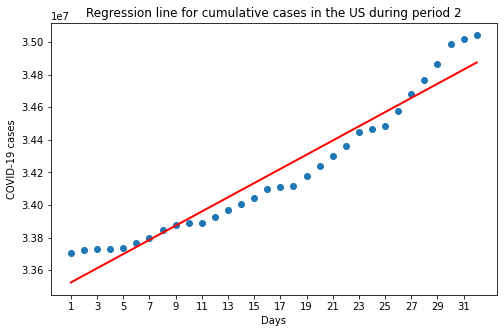

In [16]:
plt.figure(figsize=(8,5))

plt.scatter(days_xvector2, cases_yvector2)
plt.plot(days_xvector2, yhat2, color='red', linewidth=2)
plt.xticks(days_xvector2[::2])
plt.xlabel('Days')
plt.ylabel('COVID-19 cases')
_ = plt.title('Regression line for cumulative cases in the US during period 2')

### Problem 1.3

Compare the linear regression results for 1.1 and 1.2. In which case does the model better fit the data?

Qualitatively, it is clear that the linear regression model for period 1 better fits the data. To quantitatively control this, we calculate the $R^2$ values for each regression model. The model with the highest R-squared is the one which better fits the data.

In [17]:
# R-squared for period 1

TSS1 = sum((cases_yvector1 - cases_yvector1.mean()) ** 2)
RSS1 = sum((cases_yvector1 - yhat1) ** 2)
Rsquared1 = (1 - RSS1 / TSS1)
print(Rsquared1)

# R-squared for period 2

TSS2 = sum((cases_yvector2 - cases_yvector2.mean()) ** 2)
RSS2 = sum((cases_yvector2 - yhat2) ** 2)
Rsquared2 = (1 - RSS2 / TSS2)
print(Rsquared2)


0.9962773637663771
0.9394190017070472


The linear regression model for period 1 has a higher $R^2$-value, which means it better fits the data points.

### Problem 1.4 (Extra credit: 5 points)

Repeat problems 1.1, 1.2, and 1.3 but this time using *multiple regression*, regressing the 
cumulative cases onto the number of days and the cumulative deaths on that day. Thus, each of your regressions should have three parameters: an intercept, a coefficient for days, and a coefficient for deaths. When you visualize the results, plot the predicted number of cases versus days, but use the number of deaths to compute your predicted values.

In [18]:
deaths_xvector1 = merged_data_period1['deaths']
deaths_xvector2 = merged_data_period2['deaths']

#### Problem 1.4.a

We will start with the data from period 1

/Users/louisdeschuttere/opt/anaconda3/envs/iML/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


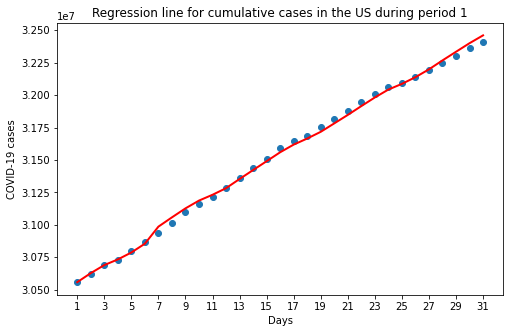

In [19]:
# Create the datamatrix

X1 = sm.add_constant(data = days_xvector1)
X1.insert(2, "deaths", deaths_xvector1, True)

# Perform the multiple regression

beta_vector1b = inv(X1.T @ X1) @ X1.T @ cases_yvector1
#yhat1b = beta_vector1b[0] + beta_vector1b[1] * days_xvector1 + beta_vector1b[2] * deaths_xvector1
yhat1b = np.dot(X1, beta_vector1b)

# Visualize the results

plt.figure(figsize=(8,5))

plt.scatter(days_xvector1, cases_yvector1)
plt.plot(days_xvector1, yhat1b, color='red', linewidth=2)
plt.xticks(days_xvector1[::2])
plt.xlabel('Days')
plt.ylabel('COVID-19 cases')
_ = plt.title('Regression line for cumulative cases in the US during period 1')

In [20]:
beta_vector1b.shape

(3,)

#### Problem 1.4.b

We will now do the same for period 2

/Users/louisdeschuttere/opt/anaconda3/envs/iML/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


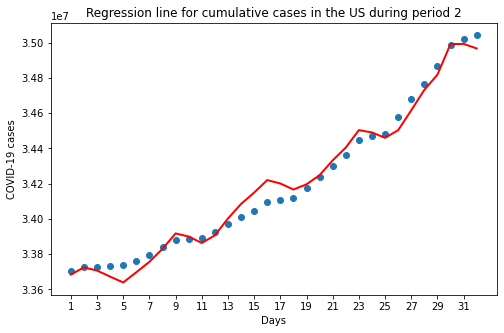

In [21]:
# Create the datamatrix

X2 = sm.add_constant(data = days_xvector2)
X2.insert(2, "deaths", deaths_xvector2, True)

# Perform the multiple regression

beta_vector2b = inv(X2.T @ X2) @ X2.T @ cases_yvector2
yhat2b = np.dot(X2, beta_vector2b)

# Visualize the results

plt.figure(figsize=(8,5))

plt.scatter(days_xvector2, cases_yvector2)
plt.plot(days_xvector2, yhat2b, color='red', linewidth=2)
plt.xticks(days_xvector2[::2])
plt.xlabel('Days')
plt.ylabel('COVID-19 cases')
_ = plt.title('Regression line for cumulative cases in the US during period 2')

#### Problem 1.4.c

Finally, we calculate the multiple R-squared value for both cases

In [22]:
# R-squared for period 1

TSS1b = sum((cases_yvector1 - cases_yvector1.mean()) ** 2)
RSS1b = sum((cases_yvector1 - yhat1b) ** 2)
Rsquared1 = (1 - RSS1b / TSS1b)
print(Rsquared1)

# R-squared for period 2

TSS2b = sum((cases_yvector2 - cases_yvector2.mean()) ** 2)
RSS2b = sum((cases_yvector2 - yhat2b) ** 2)
Rsquared2 = (1 - RSS2b / TSS2b)
print(Rsquared2)



0.9980201046188355
0.9829875401740338


Both R-squared values have increased compared to the simple linear regression case, with the model for period one still giving the best fit. The increase was expected as the multiple R-squared value never decreases if one adds variables to the model. To solve this issue, it is better to use the adjusted R-squared value:

In [23]:
# Adjusted R-squared for period 1

n1 = len(cases_yvector1)
k1 = len(X1.columns)

TSS1b = sum((cases_yvector1 - cases_yvector1.mean()) ** 2)
RSS1b = sum((cases_yvector1 - yhat1b) ** 2)
adj_Rsquared1 = (1 - (RSS1b / (n1 - k1)) / (TSS1b / (n1 - 1)))
print(adj_Rsquared1)

# Adjusted R-squared for period 2

n2 = len(cases_yvector2)
k2 = len(X2.columns)

TSS2b = sum((cases_yvector2 - cases_yvector2.mean()) ** 2)
RSS2b = sum((cases_yvector2 - yhat2b) ** 2)
adj_Rsquared2 = (1 - (RSS2b / (n2 - k2)) / (TSS2b / (n2 - 1)))
print(adj_Rsquared2)

0.9978786835201809
0.9818142670825879


In [24]:
%matplotlib inline  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dateutil
import random
import math

## Problem 2: Romance vs. Action (30 points)

Credit: Data 8

### Part 1. Exploring the dataset

In this problem, we will try to predict
a movie's genre from the text of its screenplay. We have compiled a list of 5,000 words that occur in conversations between movie characters. For each movie, our dataset tells us the frequency with which each of these words occurs in certain conversations in its screenplay. All words have been converted to lowercase.

In [25]:
movies = pd.read_csv('https://raw.githubusercontent.com/YData123/sds265-fa21/main/assignments/assn1/movies.csv')
movies.head(10)

,Title,Genre,Year,Rating,# Votes,# Words,i,the,to,a,...,foster,pub,vegetarian,garrison,grammoo,chimney,bikini,richter,psychopath,fling
0,the terminator,action,1984,8.1,183538,1849,0.040022,0.043807,0.025419,0.024878,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,batman,action,1989,7.6,112731,2836,0.051481,0.033850,0.023977,0.028209,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,tomorrow never dies,action,1997,6.4,47198,4215,0.028707,0.054330,0.030368,0.021827,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000237,0.0
3,batman forever,action,1995,5.4,77223,3032,0.036609,0.042216,0.020449,0.031003,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,supergirl,action,1984,4.1,6576,3842,0.041905,0.032275,0.028891,0.026288,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
5,the avengers,action,1998,3.4,21519,3586,0.036810,0.033463,0.024819,0.029002,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000279,0.0
6,natural born killers,action,1994,7.1,73047,5129,0.028271,0.047378,0.022032,0.027296,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
7,airplane ii: the sequel,romance,1982,5.8,15210,2328,0.027921,0.048969,0.035223,0.025773,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
8,willow,romance,1988,7.1,33506,2006,0.038883,0.028913,0.030409,0.030409,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
9,fast times at ridgemont high,romance,1982,7.2,31710,4703,0.047629,0.027217,0.030619,0.018711,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [26]:
movies.shape

(236, 5006)

In [27]:
movies.iloc[125,[0, 1, 2, 3, 4, 5, 10, 30, 5005]]

Title      intolerable cruelty
Genre                  romance
Year                      2003
Rating                     6.4
# Votes                  36739
# Words                   4586
it                    0.016572
not                   0.008504
fling                      0.0
Name: 125, dtype: object

The above cell prints a few columns of the row for the action movie *The Matrix*.  The movie contains 3792 words. The word "it" appears 115 times, as it makes up a fraction $\frac{115}{3792} \approx 0.030327$ of the words in the movie. The word "not" appears 33 times, as it makes up a fraction $\frac{33}{3792} \approx 0.00870253$ of the words. The word "fling" doesn't appear at all.

This numerical representation of a body of text, one that describes only the frequencies of individual words, is called a bag-of-words representation. A lot of information is discarded in this representation: the order of the words, the context of each word, who said what, the cast of characters and actors, etc. However, a bag-of-words representation is often used for machine learning applications as a reasonable starting point, because a great deal of information is also retained and expressed in a convenient and compact format. We will investigate whether this representation is sufficient to build an accurate genre classifier.

All movie titles are unique. The `row_for_title` function provides fast access to the one row for each title. 

In [28]:
def row_for_title(title):
    """Return the entire row for a certain title
    
    """
    return movies[movies["Title"]==title]

In [29]:
row_for_title('the terminator')

,Title,Genre,Year,Rating,# Votes,# Words,i,the,to,a,...,foster,pub,vegetarian,garrison,grammoo,chimney,bikini,richter,psychopath,fling
0,the terminator,action,1984,8.1,183538,1849,0.040022,0.043807,0.025419,0.024878,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


For example, the fastest way to find the frequency of "hey" in the movie *The Terminator* is to access the `'hey'` item from its row.

In [30]:
row_for_title('the terminator')["hey"].item()

0.000540833

This dataset was extracted from [a dataset from Cornell University](http://www.cs.cornell.edu/~cristian/Cornell_Movie-Dialogs_Corpus.html). After transforming the dataset (e.g., converting the words to lowercase, removing profanity, and converting the counts to frequencies), this new dataset was created containing the frequency of 5000 common words in each movie.

In [31]:
print('Words with frequencies:', len(movies.drop(movies.columns[np.arange(6)],axis=1).columns)) 
print('Movies with genres:', len(movies))

Words with frequencies: 5000
Movies with genres: 236


**Word Stemming**

The columns other than "Title", "Genre", "Year", "Rating", "# Votes" and "# Words" in the `movies` table are all words that appear in some of the movies in our dataset.  These words have been *stemmed*, or abbreviated heuristically, in an attempt to make different [inflected](https://en.wikipedia.org/wiki/Inflection) forms of the same base word into the same string.  For example, the column "manag" is the sum of proportions of the words "manage", "manager", "managed", and "managerial" (and perhaps others) in each movie. This is a common technique used in machine learning and natural language processing.

Stemming makes it a little tricky to search for the words you want to use, so we have provided another table that will let you see examples of unstemmed versions of each stemmed word.

In [32]:
vocab_mapping = pd.read_csv('https://raw.githubusercontent.com/YData123/sds265-fa21/main/assignments/assn1/stem.csv')
stemmed = list(movies.drop(movies.columns[np.arange(6)],axis=1).columns)
vocab_table = vocab_mapping[vocab_mapping["Stem"].isin(stemmed)]
vocab_table = vocab_table.sort_values('Stem')
vocab_table.iloc[np.arange(2000, 2010)]


,Stem,Word
25957,coloni,colonial
10851,coloni,colony
32608,coloni,colonies
2245,coloni,colonys
12087,columbia,columbia
37766,columbia,columbias
19615,column,column
1523,column,columns
12629,com,com
38458,coma,coma


### Problem 2.1.a:

Assign `stemmed_alternating` to the stemmed version of the word "alternating".

In [33]:
stemmed_alternating = vocab_table[vocab_table["Word"] == "alternating"]["Stem"].item()
stemmed_alternating

'altern'

### Problem 2.1.b:

Assign `unstemmed_run` to an array of words in `vocab_table` that have "run" as its stemmed form. 

In [34]:
unstemmed_run = vocab_table[vocab_table["Stem"] == "run"]["Word"].tolist()
unstemmed_run

['run', 'runs', 'running', 'runnings', 'runned']

**Splitting the dataset**

We're going to use our `movies` dataset for two purposes.

1. First, we want to *train* a movie genre classifier.
2. Second, we want to *test* the performance of the classifier.

So, we need two different datasets: *training* and *test*.

The purpose of a classifier is to classify unseen data that is similar to the training data. Therefore, we must ensure that there are no movies that appear in both sets. We do so by splitting the dataset randomly. The dataset has already been permuted randomly, so it's easy to split.  We just take the top for training and the rest for test. 

In [35]:
training_proportion = 17/20

num_movies = len(movies)
num_train = int(num_movies * training_proportion)
num_test = num_movies - num_train

train_movies = movies.iloc[np.arange(num_train)]
test_movies = movies.iloc[np.arange(num_train, num_movies)]

print("Training: ",   len(train_movies), ";",
      "Test: ",       len(test_movies))

Training:  200 ; Test:  36


In [36]:
len(movies)

236

### Problem 2.1.c:

Draw a horizontal bar chart with two bars that show the proportion of Action movies in each dataset.  

In [37]:
def action_proportion(dataframe):
    """Return the proportion of movies in a table that have the Action genre."""
    movie_total = len(dataframe)
    action_total = len(dataframe[dataframe["Genre"] == "action"])
    return (action_total / movie_total)

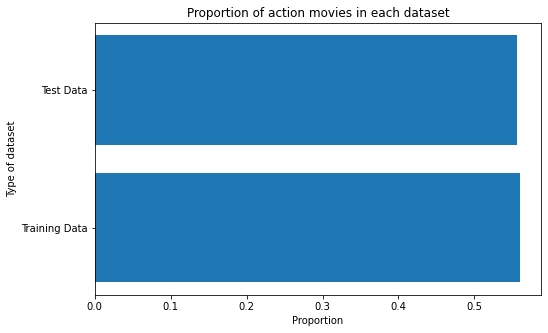

In [38]:
y = ["Training Data", "Test Data"]
x = [action_proportion(train_movies), action_proportion(test_movies)]

plt.figure(figsize=(8,5))

plt.barh(y, x)
plt.ylabel("Type of dataset")
plt.xlabel("Proportion")
plt.title("Proportion of action movies in each dataset")

plt.show()

### Part 2. K-Nearest Neighbors: A guided example

k-Nearest Neighbors (k-NN) is a classification algorithm.  Given some *attributes* (also called *features*) of an unseen example, it decides whether that example belongs to one or the other of two categories based on its similarity to previously seen examples. Predicting the category of an example is called *labeling*, and the predicted category is also called a *label*.

An attribute (feature) we have about each movie is *the proportion of times a particular word appears in the movies*, and the labels are two movie genres: romance and action.  The algorithm requires many previously seen examples for which both the attributes and labels are known: that's the `train_movies` dataframe.

**Classifying a movie**

In k-NN, we classify a movie by finding the `k` movies in the *training set* that are most similar according to the features we choose. We call those movies with similar features the *nearest neighbors*.  The k-NN algorithm assigns the movie to the most common category among its `k` nearest neighbors.

Let's limit ourselves to just 2 features for now, so we can plot each movie.  The features we will use are the proportions of the words "money" and "feel" in the movie.  Taking the movie "Batman Returns" (in the test set), 0.000502 of its words are "money" and 0.004016 are "feel". This movie appears in the test set, so let's imagine that we don't yet know its genre.

First, we need to make our notion of similarity more precise.  We will say that the *distance* between two movies is the straight-line distance between them when we plot their features in a scatter diagram. This distance is called the Euclidean ("yoo-KLID-ee-un") distance, whose formula is $\sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}$.

For example, in the movie *Titanic* (in the training set), 0.0009768 of all the words in the movie are "money" and 0.0017094 are "feel".  Its distance from *Batman Returns* on this 2-word feature set is $$\sqrt{(0.000502 - 0.0009768)^2 + (0.004016 - 0.0017094)^2} \approx 0.00235496.$$  (If we included more or different features, the distance could be different.)

A third movie, *The Avengers* (in the training set), is 0 "money" and 0.001115 "feel".

The function below creates a plot to display the "money" and "feel" features of a test movie and some training movies. As you can see in the result, *Batman Returns* is more similar to *Titanic* than to *The Avengers* based on these features. However, we know that *Batman Returns* and *The Avengers* are both action movies, so intuitively we'd expect them to be more similar. Unfortunately, that isn't always the case. We'll discuss this more later.

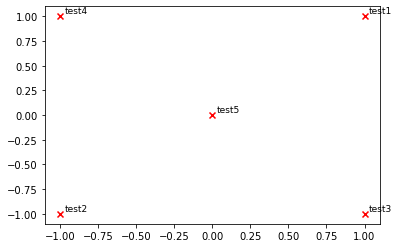

In [39]:
def plot_embeddings(M_reduced, word2Ind, words):
    """ 
        Plot in a scatterplot the embeddings of the words specified in the list "words".
        Include a label next to each point.
    """
    for word in words:
        x, y = M_reduced[word2Ind[word]]
        plt.scatter(x, y, marker='x', color='red')
        plt.text(x+.03, y+.03, word, fontsize=9)
    plt.show()

M_reduced_plot_test = np.array([[1, 1], [-1, -1], [1, -1], [-1, 1], [0, 0]])
word2Ind_plot_test = {'test1': 0, 'test2': 1, 'test3': 2, 'test4': 3, 'test5': 4}
words = ['test1', 'test2', 'test3', 'test4', 'test5']
plot_embeddings(M_reduced_plot_test, word2Ind_plot_test, words)

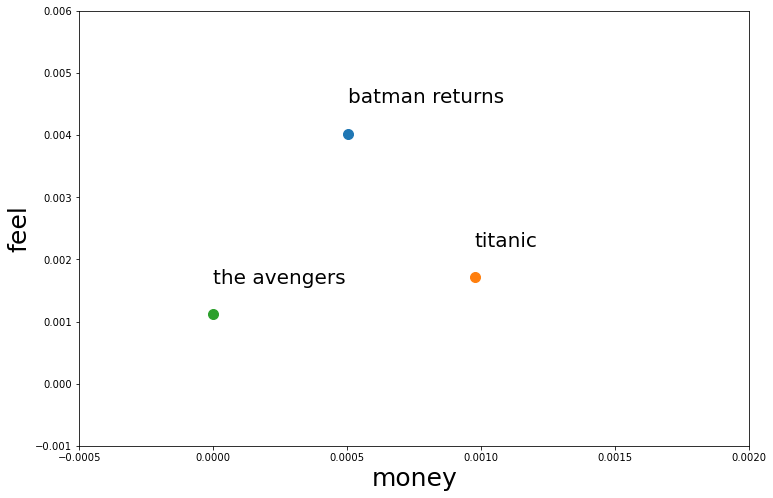

In [40]:
def plot_with_two_features(test_movie, training_movies, x_feature, y_feature):
    """Plot a test movie and training movies using two features."""
    test_row = row_for_title(test_movie)
    test_x = test_row[x_feature].item()
    test_y = test_row[y_feature].item()
    plt.scatter(test_x, test_y, s=100)
    plt.text(test_x, test_y+.0005, test_movie, fontsize=20)
    for movie in training_movies:
        row = row_for_title(movie)
        train_x = row[x_feature].item()
        train_y = row[y_feature].item()
        plt.scatter(train_x, train_y, s=100)
        plt.text(train_x, train_y+.0005, movie, fontsize=20)
    plt.show()
    
plt.figure(figsize=(12, 8))
plt.xlim(-0.0005, 0.002)
plt.ylim(-0.001, 0.006)
plt.xlabel('money', fontsize=25)
plt.ylabel('feel', fontsize=25)

training = ["titanic", "the avengers"]
plot_with_two_features("batman returns", training, "money", "feel")

### Problem 2.2.a:

Compute the distance between the two action movies, *Batman Returns* and *The Avengers*, using the `money` and `feel` features only.  Assign it the name `action_distance`.

**Note:** If you have a row, you can use `item` to get a value from a column by its name.  For example, if `r` is a row, then `r["Genre"].item()` is the value in column `"Genre"` in row `r`.

*Hint*: Remember the function `row_for_title`, redefined for you below. 

In [41]:
def row_for_title(title):
    """Return the row for a title
    
    """
    return movies[movies["Title"]==title]

In [42]:
def Euclidean2D(x1, y1, x2, y2):
    """Calculates the Euclidian distance between two points in a 2D space
    
    """
    return math.sqrt((x1 - x2)**2 + (y1 - y2)**2)

In [43]:
Euclidean2D(0,0,1,1)

1.4142135623730951

In [44]:
batman = row_for_title("batman returns") 
avengers = row_for_title("the avengers") 
action_distance = Euclidean2D(batman["money"].item(), batman["feel"].item(), 
                              avengers["money"].item(), avengers["feel"].item())
action_distance

0.0029437356216700235

Below, we've added a third training movie, *The Terminator*. Before, the point closest to *Batman Returns* was *Titanic*, a romance movie. However, now the closest point is *The Terminator*, an action movie.

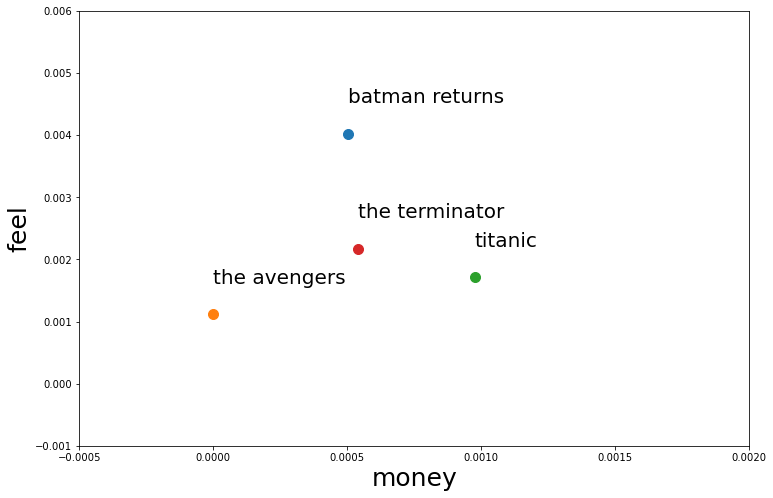

In [45]:
plt.figure(figsize=(12, 8))
plt.xlim(-0.0005, 0.002)
plt.ylim(-0.001, 0.006)
plt.xlabel('money', fontsize=25)
plt.ylabel('feel', fontsize=25)

training = ["the avengers", "titanic", "the terminator"] 
plot_with_two_features("batman returns", training, "money", "feel") 

### Problem 2.2.b:

Complete the function `distance_two_features` that computes the Euclidean distance between any two movies, using two features. The last two lines call your function to show that *Batman Returns* is closer to *The Terminator* than *The Avengers*. 

In [46]:
def distance_two_features(title0, title1, x_feature, y_feature):
    """Compute the distance between two movies with titles title0 and title1
    
    Only the features named x_feature and y_feature are used when computing the distance.
    """
    row0 = row_for_title(title0)
    row1 = row_for_title(title1)
    
    x0 = row0[x_feature].item()
    x1 = row1[x_feature].item()
    y0 = row0[y_feature].item()
    y1 = row1[y_feature].item()
    
    return math.sqrt((x0 - x1)**2 + (y0 - y1)**2)

for movie in ["the terminator", "the avengers"]:
    movie_distance = distance_two_features(movie, "batman returns", "money", "feel")
    print(movie, 'distance:\t', movie_distance)

the terminator distance:	 0.0018531387547749897
the avengers distance:	 0.0029437356216700235


### Problem 2.2.c:

Define the function `distance_from_batman_returns` so that it works as described in its documentation.

In [47]:
def distance_from_batman_returns(title):
    """The distance between the given movie and "batman returns", based on the features "money" and "feel".
    
    This function takes a single argument:
      title: A string, the name of a movie.
    """
    return distance_two_features(title, "batman returns", "money", "feel")

distance_from_batman_returns("the avengers")

0.0029437356216700235

### Problem 2.2.d:

Using the features `"money"` and `"feel"`, what are the names and genres of the 7 movies in the **training set** closest to "batman returns"?  To answer this question, make a table named `close_movies` containing those 7 movies with columns `"Title"`, `"Genre"`, `"money"`, and `"feel"`, as well as a column called `"distance from batman"` that contains the distance from "batman returns".  The dataframe should be **sorted in ascending order by `distance from batman`**.


In [48]:
movies_copy = movies

distance_batman = []

for i in np.arange(len(movies)):
    distance_batman.append(distance_from_batman_returns(movies_copy["Title"][i]))

movies_copy.insert(len(movies_copy.columns), "distance from batman", distance_batman)
movies_copy.head(5)

,Title,Genre,Year,Rating,# Votes,# Words,i,the,to,a,...,pub,vegetarian,garrison,grammoo,chimney,bikini,richter,psychopath,fling,distance from batman
0,the terminator,action,1984,8.1,183538,1849,0.040022,0.043807,0.025419,0.024878,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.001853
1,batman,action,1989,7.6,112731,2836,0.051481,0.033850,0.023977,0.028209,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.002895
2,tomorrow never dies,action,1997,6.4,47198,4215,0.028707,0.054330,0.030368,0.021827,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000237,0.0,0.003067
3,batman forever,action,1995,5.4,77223,3032,0.036609,0.042216,0.020449,0.031003,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.002373
4,supergirl,action,1984,4.1,6576,3842,0.041905,0.032275,0.028891,0.026288,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.001674


In [49]:
# The sample solution took multiple lines.
k = 7

close_movies = movies_copy.sort_values(by = ["distance from batman"])[1:(k+1)][["Title", "Genre",
                                                                                "money", "feel",
                                                                                "distance from batman"]]
close_movies

,Title,Genre,money,feel,distance from batman
61,the bridges of madison county,romance,0.000565,0.004333,0.000323
199,the fisher king,romance,0.000618,0.003504,0.000525
81,broadcast news,romance,0.000137,0.003553,0.000590
201,x-men,action,0.000000,0.003456,0.000752
24,hellboy,action,0.000000,0.003350,0.000834
120,as good as it gets,romance,0.000523,0.003139,0.000878
193,spider-man,action,0.000347,0.003126,0.000903


### Problem 2.2.e:

Next, we'll classify "batman returns" based on the genres of the closest movies. 

In [50]:
def most_common(label, dataframe):
    """The most common element in a column of a table.
    
    This function takes two arguments:
      label: The label of a column, a string.
      dataframe: A dataframe.
     
    It returns the most common value in that column of that table.
    In case of a tie, it returns any one of the most common values
    """
    return dataframe[label].value_counts().sort_values().index[-1]
    
# Calling most_common on your table of 7 nearest neighbors classifies
# "batman returns" as a romance movie, 5 votes to 2. 
most_common('Genre', close_movies)

'romance'

### Part 3. Features

Now, we're going to extend our classifier to consider more than two features at a time.

Euclidean distance still makes sense with more than two features. For `n` different features, we compute the difference between corresponding feature values for two movies, square each of the `n`  differences, sum up the resulting numbers, and take the square root of the sum.

### Problem 2.3.a:

Write a function to compute the Euclidean distance between two **arrays** of features of *arbitrary* (but equal) length.  Use it to compute the distance between the first movie in the training set and the first movie in the test set, *using all of the features*.  (Remember that the first six columns of your tables are not features.)


In [51]:
train_movies.head()

,Title,Genre,Year,Rating,# Votes,# Words,i,the,to,a,...,foster,pub,vegetarian,garrison,grammoo,chimney,bikini,richter,psychopath,fling
0,the terminator,action,1984,8.1,183538,1849,0.040022,0.043807,0.025419,0.024878,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,batman,action,1989,7.6,112731,2836,0.051481,0.033850,0.023977,0.028209,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,tomorrow never dies,action,1997,6.4,47198,4215,0.028707,0.054330,0.030368,0.021827,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000237,0.0
3,batman forever,action,1995,5.4,77223,3032,0.036609,0.042216,0.020449,0.031003,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,supergirl,action,1984,4.1,6576,3842,0.041905,0.032275,0.028891,0.026288,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [52]:
def distance(features1, features2):
    """The Euclidean distance between two arrays of feature values."""
    sum = 0
    
    for i in np.arange(len(features1)):
        sum = sum + (features1[i] - features2[i]) ** 2
        
    return math.sqrt(sum)

movie1 = np.array(train_movies.iloc[0])[6:]
movie2 = np.array(test_movies.iloc[0])[6:]

distance_first_to_first = distance(movie1, movie2)
distance_first_to_first

0.042203549225386355

**Creating your own feature set**

Unfortunately, using all of the features has some downsides.  One clear downside is *computational* -- computing Euclidean distances just takes a long time when we have lots of features.  You might have noticed that in the last question!

So we're going to select just 20.  We'd like to choose features that are very *discriminative*. That is, features which lead us to correctly classify as much of the test set as possible.  This process of choosing features that will make a classifier work well is sometimes called *feature selection*, or more broadly *feature engineering*.

### Problem 2.3.b:

The plot below (generated for you) shows the average number of times each word occurs in a romance movie on the horizontal axis and the average number of times it occurs in an action movie on the vertical axis. 

![alt text](https://raw.githubusercontent.com/YData123/sds265-fa21/main/assignments/assn1/word_plot.png)

### Problem 2.3.c:

Using the plot above, choose 20 common words that you think might let you distinguish between romance and action movies. Make sure to choose words that are frequent enough that every movie contains at least one of them. Don't just choose the 20 most frequent, though... you can do much better.


In [53]:
# Set my_20_features to a list of 20 features (strings that are column labels)

my_20_features = ["power", "captain", "weve", "command", "system", "ship", "cop", "move", "world", "run",
                  "write", "happi", "wife", "letter", "hous", "huh", "marri", "fine", "ladi", "home"]

train_20 = train_movies[my_20_features]
test_20 = test_movies[my_20_features]

In [54]:
len(my_20_features)

20

In two sentences or less, describe how you selected your features. 

The selection of the features is based on the perpendicular distance of the points to the red line. The points which are the further away from the line tend to be more unique to a particular film category. Ten points are chosen at each side of the line. Points with a low rate of occurence are also avoided.

Next, let's classify the first movie from our test set using these features.  You can examine the movie by running the cells below. Do you think it will be classified correctly?

In [55]:
print("Movie:")
print(test_movies.iloc[0,[0,1]])
print("Features:")
print(test_20.iloc[0])

Movie:
Title    the mummy
Genre       action
Name: 200, dtype: object
Features:
power      0.000000
captain    0.000000
weve       0.000321
command    0.000321
system     0.000000
ship       0.000000
cop        0.000000
move       0.000000
world      0.000321
run        0.000000
write      0.000321
happi      0.000000
wife       0.000000
letter     0.000000
hous       0.000000
huh        0.000963
marri      0.000321
fine       0.000321
ladi       0.000963
home       0.000000
Name: 200, dtype: float64


As before, we want to look for the movies in the training set that are most like our test movie.  We will calculate the Euclidean distances from the test movie (using the 20 selected features) to all movies in the training set.  You could do this with a `for` loop, but to make it computationally faster, we have provided a function, `fast_distances`, to do this for you.  Read its documentation to make sure you understand what it does.  (You don't need to understand the code in its body unless you want to.)

In [56]:
def fast_distances(test_row, train_dataframe):
    """An array of the distances between test_row and each row in train_rows.

    Takes 2 arguments:
      test_row: A row of a table containing features of one
        test movie (e.g., test_20.iloc[0]).
      train_table: A table of features (for example, the whole
        table train_20)."""
    assert len(train_dataframe.columns) < 50, "Make sure you're not using all the features of the movies table."
    counts_matrix = np.asmatrix(train_20.values)
    diff = np.tile(test_row.values, [counts_matrix.shape[0], 1]) - counts_matrix
    np.random.seed(0) # For tie breaking purposes
    distances = np.squeeze(np.asarray(np.sqrt(np.square(diff).sum(1))))
    eps = np.random.uniform(size=distances.shape)*1e-10 #Noise for tie break
    distances = distances + eps
    return distances

### Problem 2.3.d:

Use the `fast_distances` function provided above to compute the distance from the first movie in the test set to all the movies in the training set, **using your set of 20 features**.  Make a new dataframe called `genre_and_distances` with one row for each movie in the training set and three columns:
* The `"Title"` of the training movie
* The `"Genre"` of the training movie
* The `"Distance"` from the first movie in the test set 

Ensure that `genre_and_distances` is **sorted in increasing order by distance to the first test movie**.

In [57]:
train_movies23d = train_movies.assign(Distance = fast_distances(test_20.iloc[0], train_20))
genre_and_distances = train_movies23d.sort_values(by = ["Distance"])[["Title", "Genre", "Distance"]]   

genre_and_distances.head()

,Title,Genre,Distance
38,conspiracy theory,romance,0.001384
130,pretty woman,romance,0.001453
70,what women want,romance,0.001573
49,ninotchka,romance,0.001596
177,the hustler,romance,0.001614


### Problem 2.3.e:

Now compute the 5-nearest neighbors classification of the first movie in the test set.  That is, decide on its genre by finding the most common genre among its 5 nearest neighbors in the training set, according to the distances you've calculated.  Then check whether your classifier chose the right genre.  (Depending on the features you chose, your classifier might not get this movie right, and that's okay.)

In [58]:
# Set my_assigned_genre to the most common genre among these.
my_assigned_genre = most_common('Genre', genre_and_distances[0:5])

# Set my_assigned_genre_was_correct to True if my_assigned_genre
# matches the actual genre of the first movie in the test set.
my_assigned_genre_was_correct = test_movies.iloc[0, 1] == my_assigned_genre

print("The assigned genre, {}, was{}correct.".format(my_assigned_genre, 
                                                     " " if my_assigned_genre_was_correct else " not "))

The assigned genre, romance, was not correct.


**A classifier function**

Now we can write a single function that encapsulates the whole process of classification.

### Problem 2.3.f:

Write a function called `classify`.  It should take the following four arguments:
* A row of features for a movie to classify (e.g., `test_20.iloc[0]`).
* A table with a column for each feature (e.g., `train_20`).
* An array of classes that has as many items as the previous table has rows, and in the same order.
* `k`, the number of neighbors to use in classification.

It should return the class a `k`-nearest neighbor classifier picks for the given row of features (the string `'Romance'` or the string `'Action'`).

In [59]:
def classify(test_row, train_rows, train_labels, k):
    """Return the most common class among k nearest neigbors to test_row."""
    distances = fast_distances(test_row, train_rows)
    train_movies23f = train_rows.assign(Distance = distances)
    train_movies23f = train_movies23f.assign(Genre = train_labels)
    genre_and_distances = train_movies23f.sort_values(by = ["Distance"])
    
    return most_common('Genre', genre_and_distances[0:k])

### Problem 2.3.g:

Assign `king_kong_genre` to the genre predicted by your classifier for the movie "king kong" in the test set, using **11 neighbors** and using your 20 features.

In [60]:
# The sample solution first defined a row called king_kong_features.
king_kong_features = test_movies.loc[movies["Title"] == "king kong"][my_20_features]
train_labels = train_movies["Genre"]

king_kong_genre = classify(king_kong_features, train_20, train_labels, 11)
king_kong_genre

'action'

Finally, when we evaluate our classifier, it will be useful to have a classification function that is specialized to use a fixed training set and a fixed value of `k`.

### Problem 2.3.h:

Create a classification function that takes as its argument a row containing your 20 features and classifies that row using the 11-nearest neighbors algorithm with `train_20` as its training set.

In [61]:
def classify_feature_row(row):
    return classify(row, train_20, train_movies["Genre"], 11)

# When you're done, this should produce 'Romance' or 'Action'.
classify_feature_row(test_20.iloc[0])

'romance'

### Part 4: Evaluating your classifier

Now that it's easy to use the classifier, let's see how accurate it is on the whole test set.

### Problem 2.4.a:

Use `classify_feature_row` and [`pandas.DataFrame.apply`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html) (or a loop) to classify every movie in the test set.  Assign these guesses as an array to `test_guesses`.  **Then**, compute the proportion of correct classifications. 

In [62]:
a = np.empty(len(test_movies), dtype=object)

for i in np.arange(len(test_movies)):
    a[i] = classify_feature_row(test_20.iloc[i])
test_guesses = a

In [63]:
test_real = test_movies["Genre"]

sum_correct = 0

for i in np.arange(len(test_movies)):
    if (test_real.iloc[i] == test_guesses[i]):
        sum_correct = sum_correct + 1

sum_correct

27

In [64]:
proportion_correct = sum_correct / len(test_movies)
proportion_correct

0.75

### Problem 2.4.b:

An important part of evaluating your classifiers is figuring out where they make mistakes. Assign the name `test_movie_correctness` to a dataframe with three columns, `'Title'`, `'Genre'`, and `'Was correct'`. The last column should contain `True` or `False` depending on whether or not the movie was classified correctly.

In [65]:
b = np.empty(len(test_movies), dtype=object)

for i in np.arange(len(test_movies)):
    b[i] = test_real.iloc[i] == test_guesses[i]
b

array([False, True, False, False, False, True, True, True, True, False,
       True, True, True, True, True, True, False, True, True, True, True,
       True, True, True, True, False, True, True, True, True, True, False,
       True, True, False, True], dtype=object)

In [66]:
test_movie_correctness = test_movies.assign(Was_correct = b)[['Title', 'Genre', 'Was_correct']]
test_movie_correctness.sort_values('Was_correct')

,Title,Genre,Was_correct
200,the mummy,action,False
234,american outlaws,action,False
216,top gun,romance,False
225,rear window,romance,False
231,legend,romance,False
209,badlands,romance,False
204,the bourne supremacy,action,False
203,witness,romance,False
202,men in black,action,False
230,48 hrs.,action,True


### Problem 2.4.c:

Do you see a pattern in the mistakes that your classifier makes? In two sentences or less, describe any patterns you see in the results or any other interesting findings from the table above. If you need some help, try looking up the movies that your classifier got wrong on Wikipedia.

In [67]:
row_for_title("american outlaws")[my_20_features]

,power,captain,weve,command,system,ship,cop,move,world,run,write,happi,wife,letter,hous,huh,marri,fine,ladi,home
234,0.000398,0.0,0.000795,0.0,0.0,0.0,0.0,0.001392,0.000199,0.000596,0.000199,0.000398,0.000596,0.0,0.000199,0.0,0.000199,0.001988,0.000398,0.001789


In [68]:
row_for_title("witness")[my_20_features]

,power,captain,weve,command,system,ship,cop,move,world,run,write,happi,wife,letter,hous,huh,marri,fine,ladi,home
203,0.0,0.0,0.000337,0.0,0.0,0.0,0.002024,0.001012,0.0,0.000675,0.0,0.0,0.000337,0.0,0.002024,0.0,0.000337,0.001012,0.000337,0.001012


The classifier got 4 Action movies and 5 Romantic movies wrong, which means there is no pattern in the genre. By looking more in depth to the contect of the "wrong classified" movies, one can investigate where things went wrong. The action movie American outlaw, for example, contains many romantic related words like happiness, marriage, lady, etc. This is because there are also a lot of love-related scenes involved in the movie, although it is not the main topic. The romantic movie Witness contains a lot of action words, like cop, move, run, etc. This is because the movie is also about detectives and cops, although it still is a romantic movie.  

The classifier can be improved by changing the features, adding more features, or by, for example, putting more weight on the important features.